# Bag Of Words
## S1: "I LIKE it"    
## S2: "I don't like it"
## S3: "I like it a lot"

||I|like|it|don't|a|lot|(I like)| (like it)|...|
|--|--|--|--|--|--|--|--|--|--|
|S1|1|1|1|0|0|0|1|1|..|
|S2|1|1|1|1|0|0|0|1|..|
|S3|1|1|1|0|1|1|1|1|..|

### Difficulties creating the matrix
* Capitalization
* Punctuation
* Typos/Slang/Too many Spaces
* Encoding (ASCII/utf-8)

### Difficulties with doc-term (feature) matrix
Turn words into tokens
* n-grams (2-gram = all possible pairs)
* Stop words (very common words to leave out), e.g. "a" "and"
* Stemming (use only the stem of words, cleaned -> clean)
* Lemmatization (use language rules to simplify matrix)

Package recommendation: `nltk`

In [56]:
import numpy as np
import re
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [5]:
url_moby_dick = 'https://www.gutenberg.org/files/2701/old/moby10b.txt'
url_sea_wolf = 'https://www.gutenberg.org/cache/epub/1074/pg1074.txt'

## Get sentences (needs `nltk` package)

In [71]:
import nltk.data
nltk.download('punkt')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
seawolf_chapters = []
mobydick_chapters = []
for i in range(10):
    with open(f'sea{i+1}.txt', 'r') as my_file:
        seawolf_chapters.append(tokenizer.tokenize(my_file.read()))
        
for i in range(10):
    with open(f'moby{i+1}.txt', 'r') as my_file:
        mobydick_chapters.append(tokenizer.tokenize(my_file.read()))

[nltk_data] Downloading package punkt to /home/jens/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## File import

`i = 1
1) 'sea'+str(i)+'.txt' -> sea1.txt
2) f'sea{i}.txt' -> sea1.txt
3) 'sea{}.txt'.format(i)```

In [6]:
# import seawolf chapter 1-10
seawolf_chapters = []
for i in range(10):
    with open(f'sea{i+1}.txt', 'r') as my_file:
        seawolf_chapters.append(my_file.readlines())

In [7]:
# import mobydick chapter 1-10
mobydick_chapters = []
for i in range(10):
    with open(f'moby{i+1}.txt', 'r') as my_file:
        mobydick_chapters.append(my_file.readlines())

In [60]:
## Replaced by list comprehension
# corpus = []
# for chapter in seawolf_chapters:
#     for sentence in chapter:
#         corpus.append(sentence)

In [72]:
# flatten lists & count lines (for y_train!)
corpus_seawolf = [sentence for chapter in seawolf_chapters for sentence in chapter]
len(corpus_seawolf)

1668

In [73]:
# flatten lists & count lines (for y_train!)
corpus_mobydick = [sentence for chapter in mobydick_chapters for sentence in chapter]
len(corpus_mobydick)

866

In [74]:
# get corpus for BoW
corpus = corpus_seawolf.copy() # copy of corpus_seawolf (deep copy)
# corpus = corpus_seawolf is not good, beacuse lists are mutable (shallow copy)
corpus.extend(corpus_mobydick)

## Test sentences

In [75]:
test_texts = []

In [76]:
test_texts.append("""Louis has also given me additional information about Death Larsen, which
tallies with the captain’s brief description.""") 

In [77]:
test_texts.append("""Be it said, that
though I had felt such a strong repugnance to his smoking in the bed
the night before, yet see how elastic our stiff prejudices grow when
love once comes to bend them.""")

In [78]:
test_texts.append("""To crawl is piggish; but to not crawl, to be as
the clod and rock, is loathsome to contemplate.""")

In [79]:
test_texts.append("""Upon opening my eyes then, and coming
out of my own pleasant and self-created darkness into the imposed and
coarse outer gloom of the unilluminated twelve-o'clock-at-night, I
experienced a disagreeable revulsion.""")

In [80]:
test_texts.append("""For the Preacher loved life, and did
not want to die, saying, ‘For a living dog is better than a dead lion.’""")

### Seawolf = 1 ; Moby-Dick = 0

In [82]:
# lines
y_train = pd.Series([1] * 3038 + [0] * 1955)

# sentences
y_train = pd.Series([1] * 1668 + [0] * 866)

## Manual feature extraction (tokenization)

In [83]:
wordlists = []
# get words out of sentences and do some processing (lower case, word selection,...)
for sentence in corpus:
    text = re.findall(r'[A-Za-z+]{4,}', sentence)
    wordlists.append([word.lower() for word in text])

In [84]:
# flatten list
wordset = [word for sentence in wordlists for word in sentence]

In [85]:
len(wordset)

26889

In [86]:
# get unique set of words (columns in doc-term matrix)
wordset = sorted(list(set(wordset)))

In [87]:
len(wordset)

6826

In [88]:
# function to calculate entry in Bag of Words doc-term matrix
def calculate_bag_of_words(wordset, sentence):
    tf_dict = dict.fromkeys(wordset, 0)
    for word in sentence:
        if word not in wordset:
            continue
        tf_dict[word] = sentence.count(word)
    return tf_dict

In [89]:
bow = [calculate_bag_of_words(wordset, sentence) for sentence in wordlists]
df_bow = pd.DataFrame(bow)

In [90]:
df_bow

,aback,abandon,abandoned,abbreviated,abdomen,abed,ablaze,able,ablutions,aboard,...,yonson,young,your,yours,yourself,youth,yted,zealand,zephyr,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic regression

In [91]:
logreg_manual = LogisticRegression()
logreg_manual.fit(df_bow ,y_train)

LogisticRegression()

In [92]:
logreg_manual.score(df_bow, y_train)

0.9632991318074191

In [93]:
X_test_wordlists = []
for sentence in test_texts:
    text = re.findall(r'[A-Za-z+]{4,}', sentence)
    X_test_wordlists.append([word.lower() for word in text])

In [94]:
X_test = [calculate_bag_of_words(wordset, sentence) for sentence in X_test_wordlists]

In [95]:
X_test = pd.DataFrame(X_test)

In [96]:
X_test.head()

,aback,abandon,abandoned,abbreviated,abdomen,abed,ablaze,able,ablutions,aboard,...,yonson,young,your,yours,yourself,youth,yted,zealand,zephyr,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
logreg_manual.predict(X_test)

array([1, 0, 1, 0, 1])

In [98]:
logreg_manual.predict_proba(X_test)

array([[0.01034551, 0.98965449],
       [0.74051794, 0.25948206],
       [0.10880763, 0.89119237],
       [0.71165911, 0.28834089],
       [0.02311942, 0.97688058]])

## Sklearn CountVectorizer

In [99]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,1))
X_cv = vectorizer.fit_transform(corpus)
df_bow_sklearn = pd.DataFrame(X_cv.toarray(), columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,aback,abandon,abandoned,abbreviated,abdomen,abed,ablaze,able,ablutions,aboard,...,yokohama,yon,yonder,yonson,young,youth,yted,zealand,zephyr,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X_test = vectorizer.transform(test_texts)
df_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

In [101]:
logreg_cv = LogisticRegression()

In [102]:
logreg_cv.fit(df_bow_sklearn, y_train)

LogisticRegression()

In [103]:
logreg_cv.score(df_bow_sklearn, y_train)

0.9664561957379637

In [104]:
logreg_cv.predict(df_test)

array([1, 0, 1, 0, 1])

In [105]:
logreg_cv.predict_proba(df_test)

array([[0.04624429, 0.95375571],
       [0.73783157, 0.26216843],
       [0.10829843, 0.89170157],
       [0.50437317, 0.49562683],
       [0.01558425, 0.98441575]])

## TF-IDF
### Term frequency
### Inverse Document frequence
$$\text{tf-idf}(t_i,d_j) = \frac{f_{t_i,d_j}}{\sum_{t'\in d_j}f_{t',d_j}} \cdot \Bigl(\log\Bigl[{\frac{N+1}{n_t + 1}\Bigr]+1}\Bigr)$$

In [106]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')

In [107]:
X_tf = tfidf.fit_transform(corpus)
df_tf = pd.DataFrame(X_tf.toarray(), columns=tfidf.get_feature_names_out())

In [108]:
X_test = tfidf.transform(test_texts)
df_test = pd.DataFrame(X_test.toarray(), columns=tfidf.get_feature_names_out())

In [109]:
logreg_tfidf = LogisticRegression()

In [110]:
logreg_tfidf.fit(df_tf, y_train)

LogisticRegression()

In [111]:
logreg_tfidf.predict(df_test)

array([1, 0, 1, 1, 1])

In [112]:
logreg_tfidf.predict_proba(df_test)

array([[0.17723618, 0.82276382],
       [0.52943318, 0.47056682],
       [0.25094507, 0.74905493],
       [0.4100193 , 0.5899807 ],
       [0.14352142, 0.85647858]])

## Feature Selection

In [113]:
skb_manual = SelectKBest(f_classif, k=10)
skb_cv = SelectKBest(f_classif, k=10)
skb_tfidf = SelectKBest(f_classif, k=10)

In [114]:
skb_manual.fit(df_bow, y_train)
skb_cv.fit(df_bow_sklearn, y_train)
skb_tfidf.fit(df_tf, y_train)

SelectKBest()

In [115]:
features_manual = sorted(zip(skb_manual.scores_, skb_manual.get_feature_names_out()), reverse=True)
features_cv = sorted(zip(skb_cv.scores_, skb_cv.get_feature_names_out()), reverse=True)
features_tfidf = sorted(zip(skb_tfidf.scores_, skb_tfidf.get_feature_names_out()), reverse=True)

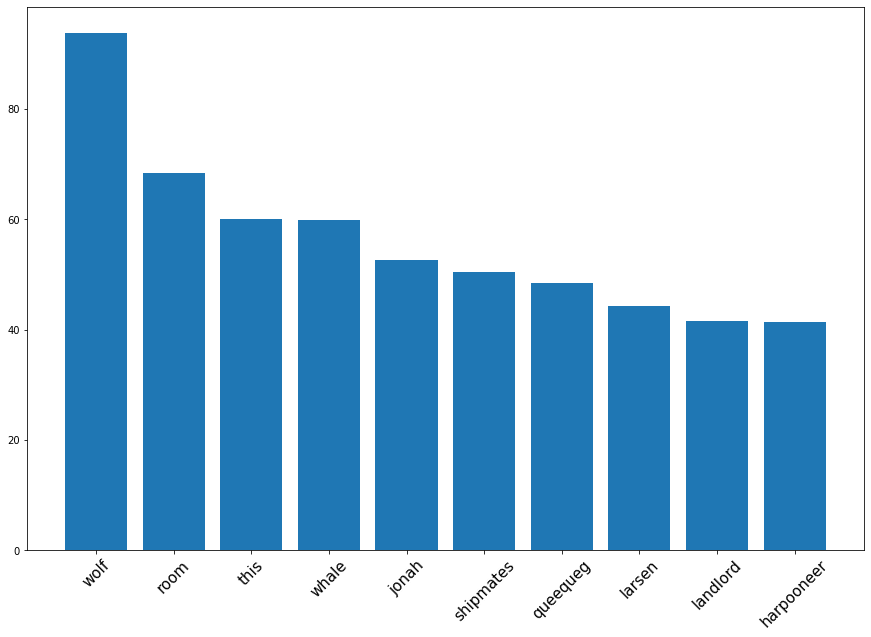

In [116]:
plt.figure(figsize=(15,10))
plt.bar(x=list(range(10)), height=sorted(skb_manual.scores_, reverse=True)[:10])
plt.xticks(list(range(10)), [feat[1] for feat in features_manual][:10], rotation=45, fontsize=15);

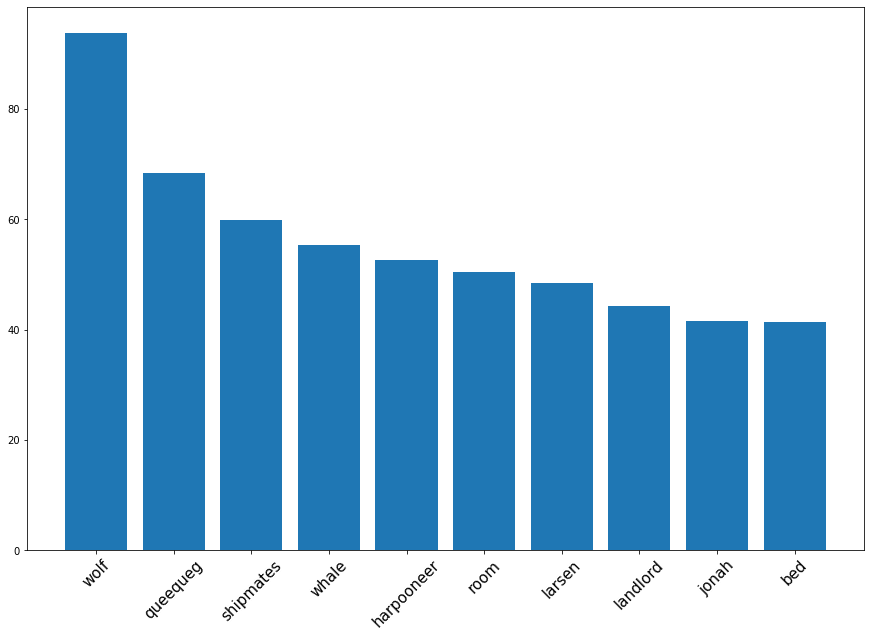

In [117]:
plt.figure(figsize=(15,10))
plt.bar(x=list(range(10)), height=sorted(skb_cv.scores_, reverse=True)[:10])
plt.xticks(list(range(10)), [feat[1] for feat in features_cv][:10], rotation=45, fontsize=15);

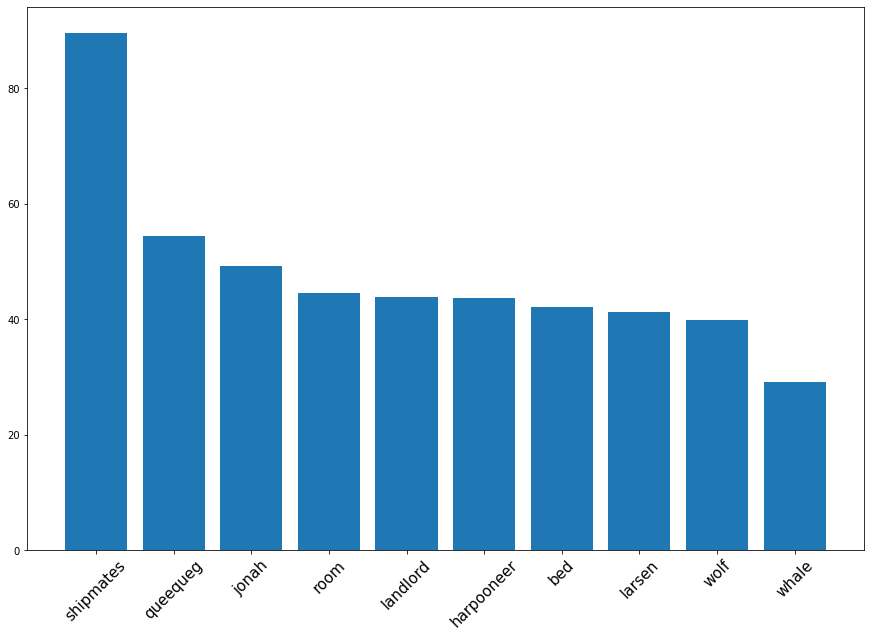

In [118]:
plt.figure(figsize=(15,10))
plt.bar(x=list(range(10)), height=sorted(skb_tfidf.scores_, reverse=True)[:10])
plt.xticks(list(range(10)), [feat[1] for feat in features_tfidf][:10], rotation=45, fontsize=15);